#**Lab.13 | IBM3202 (2021)** – Combining Coevolutionary Analysis of Sequence Information and Structure-based Models to Predict Protein Structures

###Theoretical aspects

The conservation of the three-dimensional structure among homologous proteins imposes constrains on sequence variability. Even when the sequence identity between homologous members from a given protein family can be even below the so-called twilight zone (20-30% sequence identity), their structures often exhibit **interactions between residue pairs that, when mapped onto their protein sequence, occupy equivalent positions among all proteins**. While the chemical nature of the interaction between these residue pairs can vary from one protein to another, the physical contact between these residues is **constrained in the final structure**.

Based on this, it was suggested that the **statistical analysis of correlated amino acid substitution patterns at different sequence positions of a protein family** could be exploited to **infer spatial contacts within the tertiary protein structure**. The hypothesis behind it is fairly simple: if two residues are interacting in a protein structure and a destabilizing mutations occurs in one of the residues, **a compensatory mutation at an specific residue position in a sequence preserves the stability of the protein architecture and function (FIG 1).**  



Thanks to the explosion of genomic sequencing, which has enabled the data deposition of **thousands of protein sequences** in publicly available databases, these statistical signatures left by protein evolution can be ascertained to predict which residue pairs should be in spatial proximity in the native functional protein fold.

<figure>
<center>
<img src='https://raw.githubusercontent.com/pb3lab/ibm3202/master/images/sbmdca_01.png'/ width=700>
<figcaption><b>FIGURE 1. </b>Schematic representation of the residue pair contacts that can be inferred from the coevolutionary analysis of linear protein sequences.<br>The left side of the image represents an alignment of multiple sequences of the same protein from many organisms. The boxed columns indicate two positions in this alignment whose residues are always complementary to each other, in spite of the mutations occurring in each position. This pattern suggest that these two positions likely form a physical interaction crucial for the stability of the protein structure, as shown on the right side.<br>
Cartoon by Sergey Ovchinikov, <i><a href="http://site.solab.org/home">http://site.solab.org/home</a></i></figcaption></center>
</figure>

These statistically inferred physical interactions are **a natural partner for Structure-based Models (SBM)**. The canonical SBMs **explicitly include a native bias in the potential energy function**, by treating all residue pairs **in contact in the native structure (FIG 2)** (given a distance cut-off) as **attractive interactions (FIG 3)**. All non-native interactions (i.e. those residue pairs with distances that fall outside the distance cut-off) are treated as repulsive. This condition is consistent with the notion of a sequence of a protein without highly frustrated interactions, or so-called **funneled folding landscape**.

<figure>
<center>
<img src='https://raw.githubusercontent.com/pb3lab/ibm3202/master/images/smog_01.png'/>
<figcaption><b>FIGURE 2.</b> Using a distance-based criteria to extract native contacts from a protein structure. The left panel shows the proximity of the nearest atomic contact for each residue pair in the ribosomal protein S6 up to a maximum of 1.5 nm, whereas the right panel shows the resulting coarse-grained native contact map upon filtering by a distance cutoff of 0.6 nm and a minimal sequence separation of 3 residues between interacting residues <br> Noel JK & Onuchic JN (2012) <i> Computational Modeling of Biological Systems, 31-54</i></figcaption></center>
</figure>

These attractive interactions are often model either as Lennard-Jones or Gaussian potentials, the latter corresponding to:

<center>
$C_G(r_{ij},r^{ij}_0) = \left(1+(\frac{\sigma_{NC}}{r_{ij}})^{12}\right)\left(1+G(r_{ij},r^{ij}_0)\right)-1;$

where $G(r_{ij},r^{ij}_0) = -\exp \left[-(r_{ij}-r^{ij}_0)^2(2\sigma^2)\right]$

<figure>
<img src='https://raw.githubusercontent.com/pb3lab/ibm3202/master/images/sbmdca_03.png' width=500/>
<figcaption><b>FIGURE 3.</b> Comparison of Lennard–Jones (LJ) and Gaussian contact potentials. Black curves show LJ contact potentials with minima at 6Å and 10Å. The Gaussian contact potential shown in red has an excluded volume 􏰃$NC$ that can be set independently of the location of the minimum. The dotted red line shows how the Gaussian contact would change as another minimum at 10Å is added <br> Noel JK & Onuchic JN (2012) <i> Computational Modeling of Biological Systems, 31-54</i></figcaption></center>
</figure>

SBM further reduce the complexity of the biomolecular system by using a **coarse-grained approximation**, in which each residue is replaced by a bead centered at the alpha carbon coordinates. The decrease in granularity of the  system, along with its simplified energy function, allows for efficiently simulating protein folding with minimal computational resources.

In this context, it becomes straightforward to **replace the distance-based native contacts extracted from an experimental structure by those predicted by coevolutionary analysis of protein sequences**, in order to use SBM along with DCA for **protein structure prediction**.

##Experimental Overview

In this tutorial, we will exemplify how we can **infer native contacts from the coevolutionary analysis of protein sequence information using Direct Coupling Analysis (DCA)**, and how we can then **incorporate this information in Structure-Based Models (SBM)** to predict protein structures.

We will particularly focus on comparing the inferred and experimental residue pair interactions of a **myohemerythrin** from the marine worm *Themiste hennahi*. Hemerythrin proteins ([**InterPro family PF01814**](https://www.ebi.ac.uk/interpro/entry/pfam/PF01814/)) are responsible for oxygen binding and transport in marine invertebrates and, contrary to expectations, they do not contain an heme group (as in hemoglobin). These proteins are quite small (less than 150 amino acid residues), which is a perfect protein size for our short tutorial.

For the coevolutionary analysis of linear protein sequences, we will employ the **DCA** method. The DCA scores deliver quantitative information about the existence of physical contacts in a three-dimensional structure of a biomolecule, with top-scoring pairs accurately predicting native contacts that can be observed in experimentally solved protein structures.

The top scoring residue-pair interactions inferred by DCA will be then incorporated as **Gaussian Interactions** (FIG 3) into **SBM** models, and combined with secondary structure parameters generated based on sequence predictions using **Jpred4**, for folding and predicting the three-dimensional structure of myohemerythrin.

The following tutorial is based on three different sources of information that we highly recommend to further explore:

- A tutorial on pyDCA by Mehari B. Zerihun (available in [this GitHub](https://github.com/KIT-MBS/pydca)), which is associated with the publication:
  -  Zerihun, M. B., Pucci, F., Peter, E. K., & Schug, A. (2020). pydca v1. 0: a comprehensive software for Direct Coupling Analysis of RNA and Protein Sequences. *Bioinformatics, 36*(7), 2264-2265.
- A tutorial on SBM by Jeff K. Noel and Paul C. Whitford (available in the [Structure-based Models On GROMACS [SMOG] server](https://smog-server.org)), with its usage and a general overview extensively described in the publication:
  - Noel, J. K., & Onuchic, J. N. (2012). The many faces of structure-based potentials: from protein folding landscapes to structural characterization of complex biomolecules. In *Computational Modeling of Biological Systems*, 31-54; Springer, Boston, MA.
- A tutorial and Python scripts on the combination of SBM and DCA by Ricardo N. Dos Santos (available in the [Morcos Lab website](http://morcoslaboratory.org)), which is associated with the publication:
  -  Dos Santos, R. N., Jiang, X., Martínez, L., & Morcos, F. (2019). Coevolutionary Signals and Structure-Based Models for the Prediction of Protein Native Conformations. *Methods Mol Biol, 1851*, 83-103

#Part 0. Downloading and Installing the required software

We first must install several pieces of software to perform this tutorial. Namely:

- **biopython** for manipulation of the PDB files
- **py3Dmol** for visualization of the protein structure.
- **HMMER** for aligning multiple protein sequences using profile Hidden Markov Model (HMM) of position-specific conservation.
- **pyDCA** for predicting native contacts through Direct Coupling Analysis.
- **SBM-enhanced version of GROMACS** containing Gaussian contact potentials.


1. First, we need **Python 3.7** to run our DCA calculations through the pyDCA package.

In [1]:
!apt-get install python3.7 python3-pip python3.7-distutils -y
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --config python3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib mailcap mime-support python3-setuptools python3-wheel
  python3.7-lib2to3 python3.7-minimal
Suggested packages:
  python-setuptools-doc python3.7-venv binfmt-support
The following NEW packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib mailcap mime-support python3-pip python3-setuptools
  python3-wheel python3.7 python3.7-distutils python3.7-lib2to3 python3.7-minimal
0 upgraded, 11 newly installed, 0 to remove and 49 not upgraded.
Need to get 6,688 kB of archives.
After this operation, 28.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 pyt

2. We will also need **HMMER**, a program that allows us to quickly run profile alignments.

In [2]:
!apt-get install hmmer

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libdivsufsort3
Suggested packages:
  hmmer-doc
The following NEW packages will be installed:
  hmmer libdivsufsort3
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,198 kB of archives.
After this operation, 7,621 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libdivsufsort3 amd64 2.0.1-5 [42.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 hmmer amd64 3.3.2+dfsg-1 [1,155 kB]
Fetched 1,198 kB in 1s (1,827 kB/s)
Selecting previously unselected package libdivsufsort3:amd64.
(Reading database ... 125275 files and directories currently installed.)
Preparing to unpack .../libdivsufsort3_2.0.1-5_amd64.deb ...
Unpacking libdivsufsort3:amd64 (2.0.1-5) ...
Selecting previously unselected package hmmer.
Preparing to unpack .../hmmer_3.3.2+dfsg-1_am

3. We will also need **biopython** and **ipykernel** for our python 3.7 in order to install **pydca** , while we also need **py3Dmol**, **pydca** and **biopython** simultaneously to run in our interactive python 3.10 environment, they are all available through `pip`.
  
  **DO NOT RESTART THE SESSION WHEN ASKED FOR IT, CLICK CANCEL**

In [3]:
!pip install biopython ipykernel pydca
!python3.10 -m pip install biopython py3Dmol

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 KB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.3/287.3 KB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.8/793.8 KB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 858.6/858.6 KB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.0/424.0 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 KB 8

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 24.8 MB/s eta 0:00:00


4. Lastly, we will install an **SBM-enhanced version of GROMACS** from the developers of [SMOG server](https://smog-server.org/SBMextension.html), which has been pre-compiled for the purposes of this tutorial.



In [4]:
# Download and unzip the compressed folder of SBM-enhanced GROMACS
!wget https://raw.githubusercontent.com/pb3lab/ibm3202/master/software/gromacs_sbm.tar.gz
!tar xzf gromacs_sbm.tar.gz

--2024-10-20 15:49:39--  https://raw.githubusercontent.com/pb3lab/ibm3202/master/software/gromacs_sbm.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23608271 (23M) [application/octet-stream]
Saving to: ‘gromacs_sbm.tar.gz’

gromacs_sbm.tar.gz  100%[===================>]  22.51M   123MB/s    in 0.2s    

2024-10-20 15:49:39 (123 MB/s) - ‘gromacs_sbm.tar.gz’ saved [23608271/23608271]



Once these software installation processes are completed, we are ready to perform our experiments

#Part I – Examine the three-dimensional structure of *T. hennahi* myohemerythrin

We will first download and visualize the solved structure of *T. hennahi* myohemerythrin (PDB 2mhr) through biopython and py3Dmol.

When working with protein structures solved by X-ray crystallography, the structure is often accompanied by crystallographic water molecules, and could also contains substrates or ions. We will then use biopython to clean up the PDB structure from non-protein atoms.

1. Download the structure of *T. hennahi* myohemerythrin (PDB 2mhr) using biopython:

In [5]:
#Importing your PDB file using biopython
import os
from Bio.PDB import *

#Here, we add a unique or multiple PDB accession IDs
pdbid = ['2mhr']

#We will treat the IDs as a list to download all PDBs
pdbl = PDBList()
for s in pdbid:
  pdbl.retrieve_pdb_file(s, pdir='.', file_format ="pdb", overwrite=True)
  os.rename("pdb"+s+".ent", s+".pdb")
print("DONE!")

DONE!


2. Clean up the protein structure from crystallographic waters and other non-protein atoms with biopython:

In [6]:
#Here we set up a parser for our PDB
parser = PDBParser()
io=PDBIO()
structure = parser.get_structure('A', '2mhr.pdb')
#Now we remove hydrogens, waters and ligands using Dice
#and save the cleaned-up structure with a different filename
io.set_structure(structure)
sel = Dice.ChainSelector('A', 1, 118)
io.save("2mhr_A.pdb", sel)
print("Your PDB was processed. Only the protein heavy atoms have been kept")

Your PDB was processed. Only the protein heavy atoms have been kept


3. Lastly, we will visualize the three-dimensional structure of *T. hennahi* myohemerythrin using py3Dmol.

**NOTE❗️** For other color schemes, check the available ones at the [3Dmol](https://3dmol.csb.pitt.edu/doc/types.html#ColorschemeSpec) website.

In [7]:
import py3Dmol
#First we assign the py3Dmol.view as view
view=py3Dmol.view()
#The following lines are used to add the addModel class
#to read the PDB files
view.addModel(open('2mhr_A.pdb', 'r').read(),'pdb')
#Here we set the background color as white
view.setBackgroundColor('white')
#Here we set the visualization style and color
view.setStyle({'chain':'A'},{'cartoon': {'colorscheme':'ssJmol'}})
#You can activate the labels for each residue if you want
#or comment them with a '#' at the beggining of each line if you do not want to
view.addResLabels({'resi':'1'},{'fontColor':'white','fontOpacity':1,'showBackground':'true'})
view.addResLabels({'resi':'118'},{'fontColor':'white','fontOpacity':1,'showBackground':'true'})

#Here we center the molecule for its visualization
view.zoomTo()
#And we finally visualize the structures using the command below
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

**QUESTIONS❓**
- How many helices does this structure have?
- How is the topological order of the secondary structure elements in the three-dimensional structure?
- Is there a protein region that we could intuitively identify as disordered?

#Part II – Generate a multiple sequence alignment (MSA) using HMMER

As illustrated in FIG 1, a multiple sequence alignment (MSA) of many sequences of a protein family is required to infer physical interactions. A natural question that arises is where to obtain such sequences.

As previously indicated, *T. hennahi* myohemerythrin is a member of the **Hemerythrin family** in the **InterPro** database [**PF01814**](https://www.ebi.ac.uk/interpro/entry/pfam/PF01814/). The benefit of InterPro is that it contains **seed alignments**, i.e. small MSA based on a subset of known sequences that are used to **construct profile HMMs** to search for other protein homologs or to generate a larger MSA, as well as **readily available MSAs of identified sequences using these HMM profiles**.

We will use these seed alignments and known Hemerythrin family protein sequences as inputs for generating a HMM-based MSA using HMMER.

1. We will first create a folder (**_dca_analysis_**) in which we will save all of the input and output files from our coevolutionary analysis.

In [8]:
#Let's make a folder for the coevolutionary analysis
#We need to import the os and path library
import os
from pathlib import Path

#Then, we define the path of the folder we want to create.
#Notice that the HOME folder for a hosted runtime in colab is /content/
dcapath = Path("/content/dca_analysis/")

#Now, we create the folder using the os.mkdir() command
#The 'if' conditional is just to check whether the folder already exists
#In which case, python returns an error
if os.path.exists(dcapath):
  print("path already exists")
if not os.path.exists(dcapath):
  os.mkdir(dcapath)
  print("path was succesfully created")

#We finally move onto this new folder
os.chdir(dcapath)

path was succesfully created


2. We will now download the sequence of *T. hennahi* myohemerythrin (PDB 2mhr) in FASTA format using biopython.

**NOTE❗️** Given that PDB files can contain more than one polypeptide chain, it is required to specify the chain ID from which the protein sequence will be extracted. In our case, 2MHR only contains a single chain A, thus our accession ID is *2MHR_A*

In [9]:
import os
from pathlib import Path
from Bio import SeqIO, Entrez
seqlist = ['2MHR_A']
for n in seqlist:
  #Creating folder for our sequence
  if not os.path.exists(n):
    os.mkdir(n)
  folder = Path(n)
  #Setting up your email to be able to use Entrez
  Entrez.email = 'your.email@uc.cl'
  #Here, we set up a temporary handle with our downloaded sequence in fasta format
  temp = Entrez.efetch(db="protein",rettype="fasta",id=n)
  #Creating a fasta file to write our downloaded sequence
  aaseq_out = open(folder/ "target.fasta",'w')
  #Reading the sequence information as a string in fasta format
  aaseq = SeqIO.read(temp, format="fasta")
  #Writing the sequence record in fasta format
  SeqIO.write(aaseq,aaseq_out,"fasta")
  #Closing both the temp handle and the FASTA file
  temp.close()
  aaseq_out.close()

3. Then, we will go to the [**InterPro** database](https://www.ebi.ac.uk/interpro/) and search for the appropriate protein family. You can easily do this by inputting **_Hemerythrin_** or **_PF01814_** in the **_Search by text_** tab. Once found, click on the corresponding protein family and go to the **_Alignment_** tab to obtain two different files.

  The first one is the **seed alignment**. Here, we simplify this exercise by directly downloading the seed alignment in Google Colab as a text file (*PF01814_seed*) and using `hmmbuild` from HMMER to generate our profile HMM.

In [10]:
!wget -O PF01814_seed.sto.gz https://www.ebi.ac.uk/interpro/wwwapi/entry/pfam/PF01814/\?annotation\=alignment\:seed
!gunzip -d PF01814_seed.sto.gz
!hmmbuild GA.cm PF01814_seed.sto

--2024-10-20 15:50:00--  https://www.ebi.ac.uk/interpro/wwwapi/entry/pfam/PF01814/?annotation=alignment:seed
Resolving www.ebi.ac.uk (www.ebi.ac.uk)... 193.62.193.80
Connecting to www.ebi.ac.uk (www.ebi.ac.uk)|193.62.193.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24778 (24K) [text/plain]
Saving to: ‘PF01814_seed.sto.gz’

PF01814_seed.sto.gz 100%[===================>]  24.20K  --.-KB/s    in 0.1s    

2024-10-20 15:50:01 (211 KB/s) - ‘PF01814_seed.sto.gz’ saved [24778/24778]

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             PF01814_seed.sto
# output HMM file:                  GA.cm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name     

- The second file is **a full multifasta of sequences** in Stockholm format.

In [11]:
!wget -O hemerythrin_interpro.sto.gz https://www.ebi.ac.uk/interpro/wwwapi/entry/pfam/PF01814/\?annotation=alignment:full
!gunzip -d hemerythrin_interpro.sto.gz

--2024-10-20 15:50:07--  https://www.ebi.ac.uk/interpro/wwwapi/entry/pfam/PF01814/?annotation=alignment:full
Resolving www.ebi.ac.uk (www.ebi.ac.uk)... 193.62.193.80
Connecting to www.ebi.ac.uk (www.ebi.ac.uk)|193.62.193.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3566080 (3.4M) [text/plain]
Saving to: ‘hemerythrin_interpro.sto.gz’

hemerythrin_interpr 100%[===================>]   3.40M   818KB/s    in 4.3s    

2024-10-20 15:50:12 (818 KB/s) - ‘hemerythrin_interpro.sto.gz’ saved [3566080/3566080]



4. Next, we convert our alignment into fasta format to have more control over the sequences inside it. We do this using the HHSuite reformat.pl script. Its usage is as follows:



```
reformat.pl [informat] [outformat] infile outfile [options]
```



In [12]:
!wget -O /content/reformat.pl https://raw.githubusercontent.com/soedinglab/hh-suite/master/scripts/reformat.pl
!perl /content/reformat.pl sto fas hemerythrin_interpro.sto hem_alignment.fas

#we then unalign the sequences so we can add our target sequence
!sed -i 's/-//g' hem_alignment.fas

--2024-10-20 15:50:20--  https://raw.githubusercontent.com/soedinglab/hh-suite/master/scripts/reformat.pl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28354 (28K) [text/plain]
Saving to: ‘/content/reformat.pl’

/content/reformat.p 100%[===================>]  27.69K  --.-KB/s    in 0.003s  

2024-10-20 15:50:21 (9.99 MB/s) - ‘/content/reformat.pl’ saved [28354/28354]

Reformatted hemerythrin_interpro.sto with 22191 sequences from sto to fas and written to file hem_alignment.fas


5. Then, we will add our target sequence to our sequence set and use the profile HMM to generate a MSA using `hmmalign` from HMMER. The resulting MSA will be stored as **_PF01814_2mhr_aligned.afa_**

In [13]:
!cat 2MHR_A/target.fasta hem_alignment.fas > multifasta.fasta
!hmmalign -o PF01814_2mhr_aligned.afa --outformat AFA GA.cm multifasta.fasta

We then just check that the first sequence of the alignment matches our target sequence:

In [14]:
!head PF01814_2mhr_aligned.afa

>pdb|2MHR|A Chain A, MYOHEMERYTHRIN
............................................................
..gweipepyvwdesfrv-FYEQLDE.EH.K.K.IF.K..G.IF..DC....IRDNSA..
..-----.................................----..-P..N..LA...TL
.V.KV.......TT....N.H.F.T..H..E....EA...M..M................
..........-.----......................-DA.A.K.Y...S.E......V
..V....P........H....K.....K..M..H...K..D.FL................
EKI.GGLS....AP...V...DAKN...............-------.............
.........................-VD.Y.CK.......EWLV..........NHIK.G
.TD.FKYKGK-l................................................


#Part III – Infer physical interactions between residue pairs in an MSA through coevolutionary analysis on pyDCA

The resulting MSA will be our input for our coevolutionary analysis using the **mean-field approximation of DCA (mfDCA)**, one of the two available approaches (the other being pseudo-maximum likelihood or plmDCA) in pyDCA, with mfDCA being faster to compute.

pyDCA is a python implementation of DCA that not only infers physical contacts from the MSA, but also ascertains the accuracy of our prediction by establishing the number of true positives when compared to the contacts observed in a solved protein structure.

Briefly, DCA will allow for disentangling direct contributions to correlations (resulting from native contacts) from indirect contributions (mediated through chains of native contacts). Given that our intention is to predict the structure of *T. hennahi* myohemerythrin based on sequence information alone, we will use its protein sequence as reference for the prediction of residue-pair contacts.

**NOTE❗️** While the statistical physics algorithms available in pyDCA are outside ths scope of this tutorial, a deep dive into mfDCA and plmDCA can be found in:
- Ekeberg, M., Lövkvist, C., Lan, Y., Weigt, M., & Aurell, E. (2013). Improved contact prediction in proteins: using pseudolikelihoods to infer Potts models. Physical Review E, 87(1), 012707.

1. Then, we will trim our MSA file based on the lenght of the target sequence, which in this case corresponds to the sequence of *T. hennahi* myohemerythrin that was solved by X-ray crystallography (2MHR). The code to execute is the following:

 `pydca trim_by_refseq <biomolecule>  <alignment.fa>  <refseq_file.fa> --remove_all_gaps --verbose`

 This will compare our target sequence to all the sequences in the alignment. Later, it will select the closest one and trim all the gap positions. The resulting msa will be generated in a folder named after the file with the "Trimmed" prefix.

In [15]:
!pydca trim_by_refseq protein  PF01814_2mhr_aligned.afa  2MHR_A/target.fasta --remove_all_gaps --verbose

INFO 2024-10-20 15:51:00,612 msa_trimmer __init__ 
	MSA file: PF01814_2mhr_aligned.afa
	Reference sequence file: 2MHR_A/target.fasta
	biomolecule: PROTEIN
INFO 2024-10-20 15:52:41,689 fasta_reader alignment_letter2int 
	Found 43 non-standard residues in 26 sequences
INFO 2024-10-20 15:52:41,689 fasta_reader alignment_letter2int 
	Total number of sequences read from file: 22192
INFO 2024-10-20 15:52:41,697 fasta_reader get_alignment_char_form 
	Converting sequences back to character representation
INFO 2024-10-20 15:52:42,834 sequence_backmapper _reference_sequence 
	Obtaining reference sequence from file:
		2MHR_A/target.fasta
INFO 2024-10-20 15:52:42,835 fasta_reader alignment_letter2int 
	Total number of sequences read from file: 1
INFO 2024-10-20 15:52:42,835 fasta_reader get_alignment_char_form 
	Converting sequences back to character representation
INFO 2024-10-20 15:52:42,835 sequence_backmapper _reference_sequence 
	Reference sequence:
	GWEIPEPYVWDESFRVFYEQLDEEHKKIFKGIFDCIRDNSAP

2. We can now check that the top sequence is correctly trimmed.

In [16]:
!head Trimmed_PF01814_2mhr_aligned/Trimmed_PF01814_2mhr_aligned.fa

>pdb|2MHR|A
gweipepyvwdesfrvFYEQLDEEHKKIFKGIFDCIRDNSAPNLATLVKVTTNHFTHEEAMMDAAKYSEVVPHKKMHKDFLEKIGGLSAPVDAKNVDYCKEWLVNHIKGTDFKYKGKl
>A0A176QGY9_9MICO/11126
............evvg---RFTAEHVEVIDTAGLLRRAVHDALVDLVRGLLDPHTRAEEVGLDETFADRVEGLCAEHEQLDAQLSALRAGDHS--VDRLYADLREHIHKEENGLFPA.
>A0A8H3W7B5_9PEZI/4122
..............rl-SEAIKQDHRRIEQAYRYILTSATQRWRNELALELARHCVSEEQVLLADGSSRCEKNCTDRKSLKEKICKLKAIPVDDALKSLWVDMAAHVRDTDSQ----d
>A0A3B6FPN2_WHEAT/682818
...............rPIDTIFKFHKAIRKDLEYLDVESGKGRFRLLWGLYRAHSNAEDEIVESLNQPHTESNEAEKRYLNNVIDSTRKYNELATCKSIRVALSNHVHREELELWPLf
>A0A0B2AHL0_9MICC/2143
...............dITEIILNDHHEQRRMFGILEQVSPDSVWKRLRILLEVHAAAEEKLFRESPDEETEDAVHDHNEIRDAIAGVEEAVGSVEVAEVNKVNGDHMAEEER-----q


3. Once done, we will compute our DCA scores using the **mean-field approach (mfDCA)**. For this analysis, we use the installed 'mfdca' program to analyze our trimmed MSA. We also provide a series of optional parameters:
- A pseudocount, which is basically adding extra “pseudo” observations to the real data in order to cure singularities caused by strong correlations in undersampled data, using the `pseudocount` parameter. This value is typically set to one-third (0.3) to one-half (0.5) of the total numer of sequences in the MSA.
- APC is the score that we are going to get from the analysis, it corresponds to the Frobenius norm of the coupling matrix between sites $i$ and $j$, which is then average product corrected.


In [17]:
!mfdca compute_fn protein Trimmed_PF01814_2mhr_aligned/Trimmed_PF01814_2mhr_aligned.fa --apc --pseudocount 0.5 --verbose

INFO 2024-10-20 15:54:39,920 fasta_reader alignment_letter2int 
	Found 23 non-standard residues in 16 sequences
INFO 2024-10-20 15:54:39,921 fasta_reader alignment_letter2int 
	Total number of sequences read from file: 22192
INFO 2024-10-20 15:54:39,924 meanfield_dca compute_sequences_weight 
	Computing sequences weights
INFO 2024-10-20 15:54:56,035 meanfield_dca __init__ 
	Created a MeanFieldDCA object with the following attributes
        	biomolecule: PROTEIN
        	total states at sites: 21
        	pseudocount: 0.5
        	sequence identity: 0.8
        	alignment length: 118
        	total number of unique sequences (excluding redundant sequences with 100 percent similarity): 20851
        	effective number of sequences (with sequence identity 0.8): 14206.842292520356
        
INFO 2024-10-20 15:54:56,035 meanfield_dca get_single_site_freqs 
	Computing single site frequencies
INFO 2024-10-20 15:54:57,031 meanfield_dca get_reg_single_site_freqs 
	Regularizing single site freque

4. Once these mfDCA calculations are finished, we can print them out on screen. Here, we will use python to print the top 10 DCA pairs.

In [18]:
!head -n 22 MFDCA_output_Trimmed_PF01814_2mhr_aligned/MFDCA_apc_fn_scores_Trimmed_PF01814_2mhr_aligned.txt

#======================================================================
# PARAMETERS USED FOR THIS COMPUTATION: 
#      Sequence type: PROTEIN
#      Total number of sequences in alignment data: 20851
#      Length of sequences in alignment data: 118
#      Effective number of sequences: 14206.842292520356
#      Value of sequence identity: 0.8
#      Value of relative pseudocount: 0.5
# The First and Second columns represent sites and the
# Third column is MFDCA Frobenius norm, average product corrected (APC) DCA score
#======================================================================
16      17             4.274681855996365                  
77      106            3.540452371445684                  
25      58             3.045479016216386                  
15      16             3.024910184362617                  
54      58             2.900840098018503                  
24      57             2.8708769648784527                 
14      15             2.723379437780073        

5. A more meaningful way to determine how good are our predictions of physical contacts is to visually and statistically compare them against experimental data.

  For this purpose, we will generate a `DCAVisualizer` to compare our inferred contact map against the experimental one derived from the protein structure of *T. hennahi* myohemerythrin.
  
  This visualizer takes the following inputs:



```
pydca plot_contact_map <biomolecule> <PDB_chain_name> <PDB_id/PDB_file.PDB> <refseq.fa> <DCA_file.txt> --verbose  
```



In [19]:
!pydca plot_contact_map protein A 2MHR 2MHR_A/target.fasta\
 MFDCA_output_Trimmed_PF01814_2mhr_aligned/MFDCA_apc_fn_scores_Trimmed_PF01814_2mhr_aligned.txt --verbose

INFO 2024-10-20 16:02:40,707 contact_visualizer download_pdb 
INFO 2024-10-20 16:02:40,938 contact_visualizer get_pdb_structure 
	Reading PDB structure from file: 2MHR_downloaded.pdb
INFO 2024-10-20 16:02:40,980 contact_visualizer get_pdb_structure 
	Obtained PDB structure
INFO 2024-10-20 16:02:40,980 contact_visualizer get_pdb_structure 
	Number of models in PDB structure None: 1
INFO 2024-10-20 16:02:40,980 contact_visualizer get_chain_id_list 
	Found 1 chains from PDB model
INFO 2024-10-20 16:02:40,980 contact_visualizer get_chain_id_list 
	List of chains IDs: ['A']
INFO 2024-10-20 16:02:40,981 contact_visualizer get_ref_seqs_from_fasta_file 
	Total number of sequences found in reference fasta file: 1
INFO 2024-10-20 16:02:40,981 contact_visualizer read_dca_ranked_pairs 
	Reading ranked residue pairs from DCA file MFDCA_output_Trimmed_PF01814_2mhr_aligned/MFDCA_apc_fn_scores_Trimmed_PF01814_2mhr_aligned.txt
INFO 2024-10-20 16:02:40,990 contact_visualizer read_dca_ranked_pairs 
	Numb

6. We will now plot both contact maps, with the structure-based contacts on the upper left triangle, and the DCA-based contacts on the lower right triangle. Correctly predicted contacts are shown in green, whereas false positives are shown in red. Also note that the number of DCA contacts is equivalent to $L$, where $L$ is the lenght (i.e. number of columns) of the trimmed alignment.

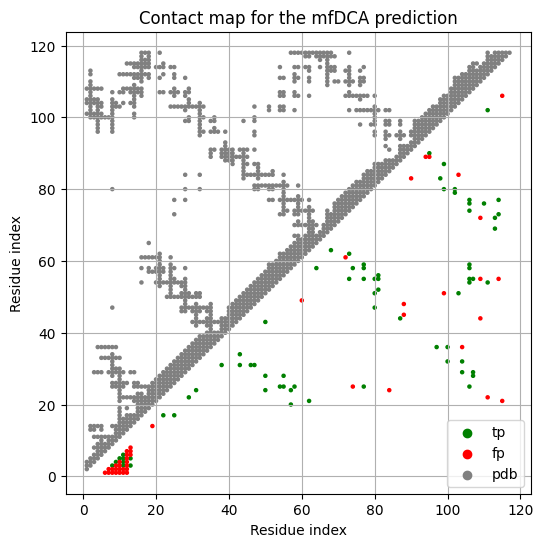

In [20]:
!awk 'NR>=23{print $5, $6, $1}' /content/dca_analysis/contact_map_2MHR/contact_map2MHR.txt > contacts.txt
!echo X Y Z > /content/headers
!cat /content/headers /content/dca_analysis/contacts.txt > /content/contacts2.txt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

data = np.genfromtxt('/content/contacts2.txt', dtype=None, names=True, encoding=None)
x = data['X']
y = data['Y']
z = data['Z']

# Define a dictionary to map categories to colors
category_colors = {
    'tp': 'green',
    'fp': 'red',
    'pdb': 'gray'
}

# Create lists to store the inverted coordinates
inverted_x = []
inverted_y = []
colors = []

plt.figure(figsize=(6, 6))

for i in range(len(z)):
    category = z[i]
    if category in ('tp', 'fp'):
        inverted_x.append(y[i])  # Invert X and Y for 'tp' and 'fp' categories
        inverted_y.append(x[i])
        colors.append(category_colors[category])
    else:
        inverted_x.append(x[i])
        inverted_y.append(y[i])
        colors.append(category_colors[category])

plt.scatter(inverted_x, inverted_y, c=colors, marker='o', s=5)  # You can change the 's' value as needed
for category, color in category_colors.items():
    plt.scatter([], [], c=color, label=category)

plt.xlabel('Residue index')
plt.ylabel('Residue index')
plt.title('Contact map for the mfDCA prediction')
plt.legend()
plt.grid(True)
plt.show()

7. Lastly, we will determine the accuracy of our coevolutionary analysis by looking at its true positive (TP) rate per rank. The TP rate per rank is the number of correctly predicted contacts per rank of the predicted pairs divided by all predictions at that rank.

  In the resulting plot, the blue line will correspond to the TP rates for the predicted contacts, and the orange line to the theoretically maximum possible true positive rate for the contacts obtained from the experimental structure.

In [21]:
!pydca plot_tp_rate protein A 2MHR 2MHR_A/target.fasta \
MFDCA_output_Trimmed_PF01814_2mhr_aligned/MFDCA_apc_fn_scores_Trimmed_PF01814_2mhr_aligned.txt

Figure(500x500)


8. Now we plot the TP rate

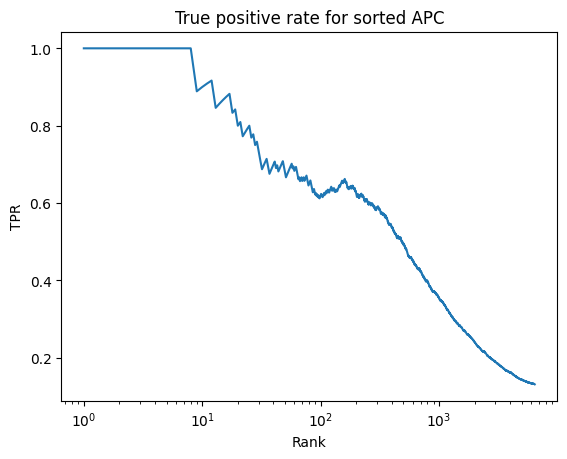

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('/content/dca_analysis/TPR_2MHR/TPR_2MHR.txt', delimiter='\t', skiprows=11, header=None, usecols=[0])

data['Index'] = range(1, len(data) + 1)
data.set_index('Index', inplace=True)
plt.semilogx(data.index, data[0], linestyle='-')
plt.xlabel("Rank")
plt.ylabel("TPR")
plt.title("True positive rate for sorted APC")
plt.show()

**QUESTIONS❓**
- How would the number of true positive contacts change as a function of the number of sequences in the MSA?
- How would the number of true positive contacts change as a function of the sequence identity in the MSA?


#Part IV – Generate an SBM based on DCA and secondary structure information for protein structure prediction

SBM are based on the treatment of **native contacts**, i.e. pairs of residues that fall below a distance cutoff in a given protein structure, as **attractive non-bonded interactions through either Lennard-Jones or Gaussian potentials**, whereas all other non-native interactions are treated as repulsive.

In this context, **the use of physical interactions between residue pairs inferred by DCA** instead of experimentally defined native contacts is a natural extension to SBM, due to the simplicity of its attractive component in the energy function.

Here, we will use our predicted contacts, along with bonded potentials (bonds, angles and dihedrals) drawn based on secondary structure predictions using **Jpred4**, to generate an SBM that enables protein folding simulations to predict the structure of *T. hennahi* myohemerythrin based on sequence information alone.

**NOTE❗️** While the details of sequence-based secondary structure prediction are outside the scope of this tutorial, a good primer is found in the following publication:

- Rost, B. (2001). Protein secondary structure prediction continues to rise. Journal of structural biology, 134(2-3), 204-218.

1. We will start by creating a new folder in which we will generate our SBM for *T. hennahi* myohemerythrin

In [23]:
#Let's make a folder for creating our structure-based model (SBM)
sbmpath = Path("/content/sbm/")

if os.path.exists(sbmpath):
  print("path already exists")
if not os.path.exists(sbmpath):
  os.mkdir(sbmpath)
  print("path was succesfully created")

#Changing directory to the sbm folder
os.chdir(sbmpath)

#We will also copy the cleaned up PDB file of 2MHR
!cp ../2mhr_A.pdb experimental.pdb

path was succesfully created


2. Now, we will store the top $L$ DCA contacts, where $L$ is the length of the (i.e. number of columns) of the MSA, as a 3-column text file with the residue pairs in columns 1 and 2 and the DCA scores in column 3.

  These contacts will be used to define **non-bonded attractive interactions betweeen residue pairs** in our SBM.

In [24]:
#Set the L length, equivalent to 'Number of DCA contacts' in our previous plots
%%bash
Length=118
awk 'NR>12&&$1+2<$2{print $1, $2, $3}' /content/dca_analysis/MFDCA_output_Trimmed_PF01814_2mhr_aligned/MFDCA_apc_fn_scores_Trimmed_PF01814_2mhr_aligned.txt | head -n $Length
awk 'NR>12&&$1+2<$2{print $1, $2, $3}' /content/dca_analysis/MFDCA_output_Trimmed_PF01814_2mhr_aligned/MFDCA_apc_fn_scores_Trimmed_PF01814_2mhr_aligned.txt | head -n $Length > predicted_contact_map.txt

77 106 3.540452371445684
25 58 3.045479016216386
54 58 2.900840098018503
24 57 2.8708769648784527
58 106 2.6325374297469266
55 77 2.4994389401372934
25 106 2.394180047236991
55 106 2.262410347563029
73 114 1.9935585735003656
48 88 1.981715981970169
26 29 1.839272554752534
25 55 1.8071580118563169
58 74 1.7800392107207579
29 107 1.7487799961711543
73 77 1.7438025261050814
69 73 1.7406186606647425
25 74 1.7242769562765912
24 28 1.6839585408405298
11 14 1.673504332860511
76 110 1.644286183601388
108 112 1.614532301265832
44 48 1.6061984398876579
16 19 1.5914255399346744
56 60 1.5818762629387542
1 5 1.52182912821511
13 16 1.5202970338398998
27 31 1.5050825602466054
76 106 1.4948081996524871
58 77 1.4904722341705339
52 81 1.4821732582559228
90 94 1.4779842062227702
2 6 1.4601019381052143
21 115 1.4566555001765162
43 47 1.4563348506439688
105 109 1.439114913765036
25 54 1.4350122188137688
21 24 1.4324655323601045
24 27 1.4308277299068597
106 115 1.402849224427632
89 92 1.3942017263133981
5 1

3. We will also need a secondary struture prediction to generate the **bonded interactions** of our SBM. For this, we will visit the [Jpred4 webserver](http://www.compbio.dundee.ac.uk/jpred/index.html), input our sequence in the text box and click on **`Make a Prediction`**, confirm that you still want to make a prediction by clicking on **`Continue`** and then select to **`View simple results in HTML`**.

  Then, load the first and second lines of the results obtained by Jpred4 in the following text box.


In [25]:
#@title Enter the amino acid sequence and predicted secondary structure of your protein
sequence = 'GWEIPEPYVWDESFRVFYEQLDEEHKKIFKGIFDCIRDNSAPNLATLVKVTTNHFTHEEAMMDAAKYSEVVPHKKMHKDFLEKIGGLSAPVDAKNVDYCKEWLVNHIKGTDFKYKGKL'  #@param {type:"string"}
Jpred = '------------------HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH----HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH---'  #@param {type:"string"}
f = open("Jpred.txt", "a")
f.write(sequence+"\n")
f.write(Jpred)
f.close()

4. The tertiary contacts inferred by DCA and the secondary structure predicted by Jpred4 will now be used to generate our SBM using the script below. The result from this script are:
- A **coordinate** file (extension **.gro**), where each residue of the target sequence is represented by a single bead and given initial positions for starting our folding simulations.
- A **topology** file (extension **.top**), which contains the non-bonded interactions from the DCA contacts as Gaussian potentials and the bonded interactions (bonds, angles, dihedrals) drawn from the secondary structure prediction as harmonic potentials.

  Upon executing this script, you will be asked to indicate a `DCA maximum force factor`, which controls the force of pairwise potentials that will drive protein folding. A good estimate for the strength of coevolutionary interactions is to consider the force factor equivalent to the ratio of $L$ over the number of DCA pairs (factor = $L$/$|$DCA$|$). Thus, **we will use a value of 1.**

In [26]:
#Downloading all required files
!wget https://github.com/pb3lab/ibm3202/raw/master/scripts/dcasbm.py
!wget https://github.com/pb3lab/ibm3202/raw/master/scripts/distavg
!wget https://github.com/pb3lab/ibm3202/raw/master/files/sbm_calpha_SA_v5_short.mdp

--2024-10-20 16:05:39--  https://github.com/pb3lab/ibm3202/raw/master/scripts/dcasbm.py
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pb3lab/ibm3202/master/scripts/dcasbm.py [following]
--2024-10-20 16:05:40--  https://raw.githubusercontent.com/pb3lab/ibm3202/master/scripts/dcasbm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7407 (7.2K) [text/plain]
Saving to: ‘dcasbm.py’

dcasbm.py           100%[===================>]   7.23K  --.-KB/s    in 0s      

2024-10-20 16:05:40 (60.4 MB/s) - ‘dcasbm.py’ saved [7407/7407]

--2024-10-20 16:05:40--  https://github.com/pb3lab/ibm3202/raw/master/sc

In [30]:
!python dcasbm.py Jpred.txt predicted_contact_map.txt


	DCA maximum force factor: Traceback (most recent call last):
  File "dcasbm.py", line 25, in <module>
    force = float(input("\n\tDCA maximum force factor: "))
KeyboardInterrupt
^C


5. Lastly, we will use our coordinate and topology files along with a parameter file to set up and run a folding simulation in our SBM-enhanced version of GROMACS.

  These simulations start at a high temperature in which the protein is unfolded, and then the system temperature is gradually reduced until the protein reaches an energy minimum where most interactions are satisfied.

**⚠️WARNING:** There is an unresolved issue with the use of Gaussian nonbonded potentials on the SBM-enhanced version of GROMACS over Google Colab, which causes errors in the simulations when running for long timesteps. Typically, this will be reflected on the run.gro file by showing **`nan`** instead of coordinate positions for all atoms. Thus, we limited ourselves to very short simulations in this tutorial. If you have this error, try to repeat your simulations. **Please proceed with caution!**

In [33]:
%%time
%%bash
source /content/gromacs_sbm/bin/GMXRC
#Preparing the binary input for our folding simulation file
gmx grompp -f sbm_calpha_SA_v5_short.mdp -c Jpred_calpha.gro -p Jpred_calpha.top -o run.tpr
#Running our folding simulation
gmx mdrun -deffnm run -nt 1 -noddcheck

Analysing residue names:
There are:   118    Protein residues
Analysing Protein...
This run will generate roughly 4 Mb of data


GROMACS:    gmx grompp, VERSION 5.0.4

GROMACS is written by:
Emile Apol         Rossen Apostolov   Herman J.C. Berendsen Par Bjelkmar       
Aldert van Buuren  Rudi van Drunen    Anton Feenstra     Sebastian Fritsch  
Gerrit Groenhof    Christoph Junghans Peter Kasson       Carsten Kutzner    
Per Larsson        Justin A. Lemkul   Magnus Lundborg    Pieter Meulenhoff  
Erik Marklund      Teemu Murtola      Szilard Pall       Sander Pronk       
Roland Schulz      Alexey Shvetsov    Michael Shirts     Alfons Sijbers     
Peter Tieleman     Christian Wennberg Maarten Wolf       
and the project leaders:
Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2014, The GROMACS development team at
Uppsala University, Stockholm University and
the Royal Institute of Technology, Sweden.
check out http://www.gromacs.org for more information.

GROMACS is free software; you can redistribute it and/or m

CPU times: user 690 ms, sys: 76.4 ms, total: 767 ms
Wall time: 2min 18s


😱 **EMERGENCY BACKUP!** Your simulation failed?! Either **run it again** or use the following code cell to download a successful simulation run:

In [ ]:
#Use only in case of emergency
#!wget https://raw.githubusercontent.com/pb3lab/ibm3202/master/files/emergency_backup/lab13/dca_sbm_backup.tar.gz
#!tar xzf dca_sbm_backup.tar.gz

6. We will now convert our final .gro structure into a PDB file for further comparison with the experimental structure of *T. hennahi* myohemerythrin

In [34]:
%%bash
source /content/gromacs_sbm/bin/GMXRC
#Converting our final structure from .gro into a PDB file
gmx editconf -f run.gro -o predicted.pdb

Read 118 atoms
Volume: 103382 nm^3, corresponds to roughly 46521900 electrons
Velocities found


GROMACS:    gmx editconf, VERSION 5.0.4

GROMACS is written by:
Emile Apol         Rossen Apostolov   Herman J.C. Berendsen Par Bjelkmar       
Aldert van Buuren  Rudi van Drunen    Anton Feenstra     Sebastian Fritsch  
Gerrit Groenhof    Christoph Junghans Peter Kasson       Carsten Kutzner    
Per Larsson        Justin A. Lemkul   Magnus Lundborg    Pieter Meulenhoff  
Erik Marklund      Teemu Murtola      Szilard Pall       Sander Pronk       
Roland Schulz      Alexey Shvetsov    Michael Shirts     Alfons Sijbers     
Peter Tieleman     Christian Wennberg Maarten Wolf       
and the project leaders:
Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2014, The GROMACS development team at
Uppsala University, Stockholm University and
the Royal Institute of Technology, Sweden.
check out http://www.gromacs.org for more information.

GROMACS is free software; you can redistribute it and/or

7. Once our folding simulation is complete and we have converted our final coordinates onto the PDB file format, we can compare the predicted structure based on sequence information alone with the experimentally determined structure of *T. hennahi* myohemerythrin. For this, we will first perform a structural alignment of both structures.

  In the following box, please enter the filename of the experimental structure (including its .pdb extension) and indicate the starting and ending residues that you wish to align (e.g. 1 to 118)
  
**NOTE❗️** Remember that, typically, the N- and C-termini of a protein structure are very flexible and can be disregarded from the structural alignmen to obtain better results.

In [35]:
#@title Perform a structural alignment between the predicted and experimental structure

import Bio.PDB

# Select what residues numbers you wish to align
# and put them in a list

#@markdown 1. Indicate the starting and ending residues you wish to align

start_resi = 17 #@param {type:"number"}
end_resi   = 118 #@param {type:"number"}
atoms_to_be_aligned = range(start_resi, end_resi + 1)

# Start the parser
pdb_parser = Bio.PDB.PDBParser(QUIET = True)

#@markdown 2. Indicate the filename of the experimental structure (PDB file)

# Get the structures
experimental = 'experimental.pdb' #@param {type:"string"}
predicted = 'predicted.pdb'
ref_structure = pdb_parser.get_structure("reference", experimental)
sample_structure = pdb_parser.get_structure("sample", predicted)

# Use the first model in the pdb-files for alignment
# Change the number 0 if you want to align to another structure
ref_model    = ref_structure[0]
sample_model = sample_structure[0]

# Make a list of the atoms (in the structures) you wish to align.
# In this case we use CA atoms whose index is in the specified range
ref_atoms = []
sample_atoms = []

# Iterate of all chains in the model in order to find all residues
for ref_chain in ref_model:
  # Iterate of all residues in each model in order to find proper atoms
  for ref_res in ref_chain:
    # Check if residue number ( .get_id() ) is in the list
    if ref_res.get_id()[1] in atoms_to_be_aligned:
      # Append CA atom to list
      ref_atoms.append(ref_res['CA'])

# Do the same for the sample structure
for sample_chain in sample_model:
  for sample_res in sample_chain:
    if sample_res.get_id()[1] in atoms_to_be_aligned:
      sample_atoms.append(sample_res['CA'])

# Now we initiate the superimposer:
super_imposer = Bio.PDB.Superimposer()
super_imposer.set_atoms(ref_atoms, sample_atoms)
super_imposer.apply(sample_model.get_atoms())

# Print RMSD:
print('The calculated RMSD is:')
print (super_imposer.rms)

# Save the aligned version of one of the chains of 6ANE
io = Bio.PDB.PDBIO()
io.set_structure(sample_structure)
io.save("predicted_aligned.pdb")

aligned = 'predicted_aligned.pdb'

The calculated RMSD is:
4.114664363753038


7. Now we can load the superimposed structure into py3dmol with the code cell shown below to visualize the accuracy of our prediction.

**QUESTION❓**
- How accurate was your prediction when compared to the experimentally solved structure of *T. hennahi* myohemerythrin?
- In which ways do you believe that the accuracy of your prediction can be improved?

In [36]:
view=py3Dmol.view()
view.addModel(open(experimental, 'r').read(),'pdb')
view.setStyle({'chain':'A'},{'cartoon': {'color':'spectrum'}})
view.addModel(open(aligned, 'r').read(),'pdb')
view.setStyle({'chain':' '},{'cartoon': {'style':'trace','color':'red'}})
#You can opt to delete these labels
view.addResLabels({'resi':'1'},{'fontColor':'white','fontOpacity':1,'showBackground':'true'})
view.addResLabels({'resi':'118'},{'fontColor':'white','fontOpacity':1,'showBackground':'true'})

view.zoomTo()
view.setBackgroundColor('white')
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.